**Key Steps for Project**
Feel free to be creative with your solutions, but do follow the CRISP-DM process in finding your solutions.

1) Pick a dataset.

Airbnb Seattle Dataset
2) Pose at least three questions related to business or real-world applications of how the data could be used.

1. Whom are the top 15 hosts in Seattle?
2. Which are the top 15 booked neighbourhoods ?
3. Which facors affect the price?

3) Create a Jupyter Notebook, using any associated packages you'd like, to:

**Prepare data:**

Gather necessary data to answer your questions
Handle categorical and missing data
Provide insight into the methods you chose and why you chose them
Analyze, Model, and Visualize

Provide a clear connection between your business questions and how the data answers them.
4) Communicate your business insights:

Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind
Create a blog post to share your questions and insights with a non-technical audience
Your deliverables will be a Github repo and a blog post. Use the rubric here to assist in successfully completing this project!

In [183]:
# Import the ncessary libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import plot
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [184]:
# Viewing the directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/seattle/listings.csv
/kaggle/input/seattle/calendar.csv
/kaggle/input/seattle/reviews.csv


In [185]:
# Import the data

listings=pd.read_csv('../input/seattle/listings.csv')
reviews=pd.read_csv('../input/seattle/reviews.csv')
calendar=pd.read_csv('../input/seattle/calendar.csv')


In [186]:
# Checking the head and tail of listings table
listings.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [187]:
listings.tail(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,NaN,NaN,https://a2.muscache.com/ac/pictures/103217071/...,https://a2.muscache.com/im/pictures/103217071/...,https://a2.muscache.com/ac/pictures/103217071/...,https://a2.muscache.com/ac/pictures/103217071/...,31148752,https://www.airbnb.com/users/show/31148752,Bo,2015-04-13,US,NaN,within a few hours,99%,100%,f,https://a2.muscache.com/ac/users/31148752/prof...,https://a2.muscache.com/ac/users/31148752/prof...,Holly,354.0,354.0,"['email', 'phone', 'linkedin', 'reviews', 'jum...",t,t,"Northwest 48th Street, Seattle, WA 98107, Unit...",Fremont,Fremont,Other neighborhoods,Seattle,WA,98107,Seattle,"Seattle, WA",US,United States,47.664295,-122.359170,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$359.00,NaN,NaN,NaN,$230.00,1,$0.00,3,1125,today,t,18,32,32,32,2016-01-04,1,2015-09-27,2015-09-27,80.0,8.0,10.0,4.0,8.0,10.0,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.3
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,This is a basement apartment in a newer reside...,Uber and Car2go are good options in Seattle. T...,https://a2.muscache.com/ac/pictures/626d4b1f-6...,https://a2.muscache.com/im/pictures/626d4b1f-6...,https://a2.muscache.com/ac/pictures/626d4b1f-6...,https://a2.muscache.com/ac/pictures/626d4b1f-6...,46566046,https://www.airbnb.com/users/show/46566046,Glen,2015-10-14,"Seattle, Washington, United States",I am a 58 year old male that is married to Mag...,within an hour,100%,100%,f,https://a2.muscache.com/ac/pictures/d7e59b0d-8...,https://a2.muscache.com/ac/pictures/d7e59b0d-8...,Portage Bay,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Fuhrman Avenue East, Seattle, WA 98102, United...",Portage Bay,Portage Bay,Capitol Hill,Seattle,WA,98102,Seattle,"Seattle, WA",US,United States,47.649552,-122.318309,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,$79.00,NaN,NaN,$500.00,$50.00,3,$25.00,2,29,2 days ago,t,6,26,44,273,2016-01-04,2,2015-12-18,2015-12-24,100.0,10.0,10.0

In [188]:
# Checking the head and tail of reviews table
reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [189]:
# Checking the head and tail of calendar table
calendar.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [190]:
# Checking the amount or numnber of rows (data) and number of columns (features)
listings.shape, reviews.shape, calendar.shape

((3818, 92), (84849, 6), (1393570, 4))

In [191]:
# Review the data with describtive statistics 

listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


**From the above we can see that there are 3,818 accomadations in the listings with 1,393,570 booking times and 84,849 reviews by customers**

In [192]:
# Checking the columns names of listings 
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [193]:
# Checking the data types of the listings table
listings.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

We will use only listing table that reflect the required information on our questions

In [194]:
# Checking the % of the null values in every column
(listings.isnull().sum()/len(listings)*100).sort_values(ascending=False)

license                             100.000000
square_feet                          97.459403
monthly_price                        60.267156
security_deposit                     51.126244
weekly_price                         47.380828
notes                                42.063908
neighborhood_overview                27.029859
cleaning_fee                         26.977475
transit                              24.463070
host_about                           22.498690
host_acceptance_rate                 20.246202
review_scores_accuracy               17.234154
review_scores_checkin                17.234154
review_scores_value                  17.181771
review_scores_location               17.155579
review_scores_cleanliness            17.103195
review_scores_communication          17.050812
review_scores_rating                 16.946045
reviews_per_month                    16.422211
first_review                         16.422211
last_review                          16.422211
space        

In [195]:
# Checking the % of the null values in every column > 30%
(listings.isnull().sum()/len(listings)*100).sort_values(ascending=False) >30

license                              True
square_feet                          True
monthly_price                        True
security_deposit                     True
weekly_price                         True
notes                                True
neighborhood_overview               False
cleaning_fee                        False
transit                             False
host_about                          False
host_acceptance_rate                False
review_scores_accuracy              False
review_scores_checkin               False
review_scores_value                 False
review_scores_location              False
review_scores_cleanliness           False
review_scores_communication         False
review_scores_rating                False
reviews_per_month                   False
first_review                        False
last_review                         False
space                               False
host_response_time                  False
host_response_rate                

In [196]:
# dropping the columns where missing values > 30%
listings = listings.drop(columns=['license', 'square_feet', 'monthly_price', 'security_deposit', 'weekly_price', 'notes'], axis =1)

In [197]:
# Checking the columns with missing values again
(listings.isnull().sum()/len(listings)*100).sort_values(ascending=False)

neighborhood_overview               27.029859
cleaning_fee                        26.977475
transit                             24.463070
host_about                          22.498690
host_acceptance_rate                20.246202
review_scores_checkin               17.234154
review_scores_accuracy              17.234154
review_scores_value                 17.181771
review_scores_location              17.155579
review_scores_cleanliness           17.103195
review_scores_communication         17.050812
review_scores_rating                16.946045
first_review                        16.422211
last_review                         16.422211
reviews_per_month                   16.422211
space                               14.903091
host_response_rate                  13.698271
host_response_time                  13.698271
neighbourhood                       10.895757
thumbnail_url                        8.381351
medium_url                           8.381351
xl_picture_url                    

In [198]:
# dropping the uncessary columns. For amenities column its relevant but. will be. dropped for easier mainpulations 

listings = listings.drop(columns=['country', 'city', 'state', 'street', 'market', 'smart_location', 'country_code', 'summary', 'description', 'space',  'jurisdiction_names', 'scrape_id', 'last_scraped', 'transit',  'host_picture_url', 'host_verifications',  'listing_url', 'experiences_offered', 'thumbnail_url',  'medium_url', 'picture_url', 'host_url', 'host_about', 'host_response_time', 'host_thumbnail_url', 'xl_picture_url', 'calendar_last_scraped', 'neighborhood_overview', 'neighbourhood', 'host_neighbourhood', 'first_review', 'last_review', 'name', 'host_location', 'calendar_updated', 'amenities'], axis =1)

In [199]:
# fill NA with 0
listings.replace(np.nan, 0, inplace=True)

In [200]:
listings.dtypes

id                                    int64
host_id                               int64
host_name                            object
host_since                           object
host_response_rate                   object
host_acceptance_rate                 object
host_is_superhost                    object
host_listings_count                 float64
host_total_listings_count           float64
host_has_profile_pic                 object
host_identity_verified               object
neighbourhood_cleansed               object
neighbourhood_group_cleansed         object
zipcode                              object
latitude                            float64
longitude                           float64
is_location_exact                    object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                            

We need to to clean the prices columns by taking out the $ symbol and converting the column from object to float

In [201]:
listings['price'] = listings.price.str.strip('$')

In [202]:
listings['cleaning_fee'] = listings.cleaning_fee.str.strip('$')

In [203]:
listings['extra_people'] = listings.extra_people.str.strip('$')

In [204]:
listings['price'] = pd.to_numeric(listings['price'],errors='coerce')

In [205]:
listings['extra_people'] = pd.to_numeric(listings['extra_people'],errors='coerce')

In [206]:
listings['cleaning_fee'] = pd.to_numeric(listings['cleaning_fee'],errors='coerce')

conveting host_since from object to datetime datatype

In [207]:
listings['host_since'] = pd.to_datetime(listings['host_since'])

We need to to clean the prices columns by taking out the % symbol and converting the column from object to float

In [208]:
listings['host_response_rate'] = listings.host_response_rate.str.strip('%')

In [209]:
listings['host_acceptance_rate'] = listings.host_acceptance_rate.str.strip('%')

In [210]:
listings['host_response_rate'] = pd.to_numeric(listings['host_response_rate'],errors='coerce')

In [211]:
listings['host_acceptance_rate'] = pd.to_numeric(listings['host_acceptance_rate'],errors='coerce')

In [212]:
listings.dtypes

id                                           int64
host_id                                      int64
host_name                                   object
host_since                          datetime64[ns]
host_response_rate                         float64
host_acceptance_rate                       float64
host_is_superhost                           object
host_listings_count                        float64
host_total_listings_count                  float64
host_has_profile_pic                        object
host_identity_verified                      object
neighbourhood_cleansed                      object
neighbourhood_group_cleansed                object
zipcode                                     object
latitude                                   float64
longitude                                  float64
is_location_exact                           object
property_type                               object
room_type                                   object
accommodates                   

In [213]:
listings.head

<bound method NDFrame.head of             id   host_id host_name host_since  host_response_rate  \
0       241032    956883     Maija 2011-08-11                96.0   
1       953595   5177328    Andrea 2013-02-21                98.0   
2      3308979  16708587      Jill 2014-06-12                67.0   
3      7421966   9851441     Emily 2013-11-06                 NaN   
4       278830   1452570     Emily 2011-11-29               100.0   
...        ...       ...       ...        ...                 ...   
3813   8101950  31148752        Bo 2015-04-13                99.0   
3814   8902327  46566046      Glen 2015-10-14               100.0   
3815  10267360  52791370  Virginia 2015-12-30                 NaN   
3816   9604740  25522052     Karen 2015-01-03               100.0   
3817  10208623  14703116       Gil 2014-04-25               100.0   

      host_acceptance_rate host_is_superhost  host_listings_count  \
0                    100.0                 f                  3.0   
1  

Converting the categorial varilables to numeric

In [214]:
listings['host_identity_verified'] = listings['host_identity_verified'].astype('category').cat.codes

In [215]:
listings['host_is_superhost'] = listings['host_is_superhost'].astype('category').cat.codes

In [216]:
listings['host_has_profile_pic'] = listings['host_has_profile_pic'].astype('category').cat.codes

In [217]:
listings['is_location_exact'] = listings['is_location_exact'].astype('category').cat.codes

In [218]:
listings['bed_type'] = listings['bed_type'].astype('category').cat.codes

In [219]:
listings['has_availability'] = listings['has_availability'].astype('category').cat.codes


In [220]:
listings['requires_license'] = listings['requires_license'].astype('category').cat.codes
	

In [221]:
listings['instant_bookable'] = listings['instant_bookable'].astype('category').cat.codes

In [222]:
listings['cancellation_policy'] = listings['cancellation_policy'].astype('category').cat.codes

In [223]:
listings['require_guest_profile_picture'] = listings['require_guest_profile_picture'].astype('category').cat.codes

In [224]:
listings['require_guest_phone_verification'] = listings['require_guest_phone_verification'].astype('category').cat.codes

In [225]:
listings['property_type'] = listings['property_type'].astype('category').cat.codes

In [226]:
listings['room_type'] = listings['room_type'].astype('category').cat.codes


Finding out if there is host name duplicates

In [227]:
dups_shape = listings.pivot_table(index=['host_id'], aggfunc='size')

In [228]:
dups_shape.index

Int64Index([    4193,     6207,     8021,     8993,    11775,    14942,
               19425,    20731,    30559,    30604,
            ...
            52012565, 52463088, 52580911, 52603251, 52791370, 52990042,
            53050379, 53065829, 53169216, 53208610],
           dtype='int64', name='host_id', length=2751)

In [229]:
listings.corr()

,id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,1.000000,0.546514,-0.025325,0.006042,-0.162782,-0.023467,-0.023467,-0.028891,-0.154708,-0.016143,0.013360,-0.181602,-0.045904,0.011411,-0.074279,-0.045175,-0.060527,-0.049869,-0.015717,-0.046239,-0.088339,-0.103058,-0.084815,-0.021601,0.101529,NaN,-0.068067,-0.075651,-0.086914,-0.159447,-0.506105,-0.386588,-0.388398,-0.380091,-0.398196,-0.394372,-0.382424,-0.380498,NaN,0.043250,-0.272284,-0.233137,-0.279053,-0.051348,-0.095897
host_id,0.546514,1.000000,-0.024539,-0.010372,-0.123735,-0.069626,-0.069626,-0.030182,-0.258666,-0.024217,0.014749,-0.082441,-0.038110,0.034739,-0.099620,-0.047812,-0.073099,-0.064821,-0.032949,-0.049315,-0.117320,-0.083187,-0.047363,-0.024572,0.057532,NaN,-0.029677,-0.037683,-0.042542,-0.083078,-0.261822,-0.207818,-0.209973,-0.204691,-0.212901,-0.209325,-0.202988,-0.200111,NaN,0.085039,-0.245191,-0.261103,-0.288960,-0.176040,-0.009382
host_response_rate,-0.025325,-0.024539,1.000000,-0.007987,0.153810,0.022147,0.022147,-0.000372,0.090387,-0.021388,-0.012355,0.096472,0.044479,-0.010282,0.005433,0.005279,-0.001040,0.015617,0.037637,-0.014071,-0.066778,0.065056,0.019094,0.006604,-0.082118,NaN,-0.047150,-0.035688,-0.031227,-0.087838,0.104779,0.097171,0.090600,0.102826,0.090744,0.093257,0.080213,0.096658,NaN,0.094017,0.092686,0.015841,0.002301,-0.087481,0.168230
host_acceptance_rate,0.006042,-0.010372,-0.007987,1.000000,0.010160,0.004365,0.004365,-0.000569,0.038433,0.004520,-0.003054,-0.006254,0.019130,-0.054062,0.012539,0.007579,0.005910,0.011714,0.037038,0.005900,0.017544,0.009642,0.011483,-0.000645,-0.013509,NaN,-0.019501,-0.017578,-0.016466,-0.016732,0.008944,-0.009612,-0.002793,-0.008859,-0.007732,-0.007579,-0.008695,-0.003750,NaN,-0.039126,0.003152,0.006014,0.006584,0.006705,0.014686
host_is_superhost,-0.162782,-0.123735,0.153810,0.010160,1.000000,-0.039775,-0.039775,0.054250,0.151422,-0.008162,-0.025029,0.060019,0.033836,-0.015971,-0.002012,0.001362,-0.026557,-0.022382,0.028015,0.012868,-0.038804,0.060904,0.041727,-0.005713,-0.037321,NaN,0.013424,0.031909,0.042953,-0.012394,0.262108,0.220262,0.219492,0.225617,0.207942,0.204925,0.202671,0.222906,NaN,0.082293,0.110963,0.099962,0.104161,-0.092745,0.311759
host_listings_count,-0.023467,-0.069626,0.022147,0.004365,-0.039775,1.000000,1.000000,0.010480,0.086930,-0.012472,0.000003,0.000906,-0.111521,-0.057998,0.111284,0.066845,0.062644,0.085609,0.031055,0.095591,0.194662,-0.059217,-0.063490,0.001901,0.022699,NaN,0.119754,0.124721,0.124040,0.086184,-0.062136,-0.031702,-0.032574,-0.022896,-0.037898,-0.031785,-0.012787,-0.033066,NaN,-0.044281,0.206622,0.103811,0.090513,0.224256,-0.093774
host_total_listings_count,-0.023467,-0.069626,0.022147,0.004365,-0.039775,1.000000,1.000000,0.010480,0.086930,-0.012472,0.000003,0.000906,-0.111521,-0.057998,0.111284,0.066845,0.062644,0.085609,0.031055,0.095591,0.194662,-0.059217,-0.063490,0.001901,0.022699,NaN,0.119754,0.124721,0.124040,0.086184,-0.062136,-0.031702,-0.032574,-0.022896,-0.037898,-0.031785,-0.012787,-0.033066,NaN,-0.044281,0.206622,0.103811,0.090513,0.224256,-0.093774
host_has_profile_pic,-0.028891,-0.030182,-0.000372,-0.000569,0.054250,0.010480,0.010480,1.000000,0.128073,0.006340,0.004937,-0.002303,0.026393,0.000125,0.012362,0.009117,0.020640,0.01499

In [230]:
listings.head()

,id,host_id,host_name,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,956883,Maija,2011-08-11,96.0,100.0,1,3.0,3.0,2,2,West Queen Anne,Queen Anne,98119,47.636289,-122.371025,1,1,0,4,1.0,1.0,1.0,4,85.0,NaN,2,5.0,1,365,0,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0,0,1,0,0,2,4.07
1,953595,5177328,Andrea,2013-02-21,98.0,100.0,2,6.0,6.0,2,2,West Queen Anne,Queen Anne,98119,47.639123,-122.365666,1,1,0,4,1.0,1.0,1.0,4,150.0,40.0,1,0.0,2,90,0,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,2,1,1,6,1.48
2,3308979,16708587,Jill,2014-06-12,67.0,100.0,1,2.0,2.0,2,2,West Queen Anne,Queen Anne,98119,47.629724,-122.369483,1,10,0,11,4.5,5.0,7.0,4,975.0,300.0,10,25.0,4,30,0,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,2,0,0,2,1.15
3,7421966,9851441,Emily,2013-11-06,NaN,NaN,1,1.0,1.0,2,2,West Queen Anne,Queen Anne,98119,47.638473,-122.369279,1,1,0,3,1.0,0.0,2.0,4,100.0,NaN,1,0.0,1,1125,0,0,0,0,143,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0.00
4,278830,1452570,Emily,2011-11-29,100.0,NaN,1,2.0,2.0,2,2,West Queen Anne,Queen Anne,98119,47.632918,-122.372471,1,10,0,6,2.0,3.0,3.0,4,450.0,125.0,6,15.0,1,1125,0,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0,0,2,0,0,1,0.89


In [231]:
listings.describe()

,id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3295.000000,3045.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3817.000000,2788.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.0,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.0,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,5.550111e+06,1.578556e+07,94.886798,99.967159,1.203248,7.154007,7.154007,1.997119,1.784442,47.628961,-122.333103,0.893662,5.922734,0.365113,3.349398,1.254191,1.305657,1.734940,3.910424,127.747708,61.710904,1.672603,10.667627,2.369303,780.447617,0.0,16.786276,36.814825,58.082504,244.772656,22.223415,78.518596,7.975642,7.921949,8.100052,8.136983,7.960450,7.828182,0.0,0.154793,1.069932,0.084075,0.098219,2.946307,1.737514
std,2.962660e+06,1.458382e+07,11.866705,1.812201,0.403768,28.621117,28.621117,0.062622,0.412535,0.043052,0.031745,0.308311,4.620642,0.541453,1.977599,0.594724,0.884219,1.139677,0.475043,89.150860,48.830341,1.311040,17.585922,16.305902,1683.589007,0.0,12.173637,23.337541,34.063845,126.772526,37.730892,35.979061,3.694899,3.671283,3.736184,3.725777,3.667938,3.630832,0.0,0.361755,0.817084,0.277537,0.297649,5.893029,1.835425
min,3.335000e+03,4.193000e+03,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.505088,-122.417219,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3.258256e+06,3.275204e+06,98.000000,100.000000,1.000000,1.000000,1.000000,2.000000,2.000000,47.609418,-122.354320,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,4.000000,75.000000,25.000000,1.000000,0.000000,1.000000,60.000000,0.0,2.000000,13.000000,28.000000,124.000000,2.000000,87.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.310000
50%,6.118244e+06,1.055814e+07,100.000000,100.000000,1.000000,1.000000,1.000000,2.000000,2.000000,47.623601,-122.328874,1.000000,10.000000,0.000000,3.000000,1.000000,1.000000,1.000000,4.000000,100.000000,50.000000,1.000000,0.000000,2.000000,1125.000000,0.0,20.000000,46.000000,73.000000,308.000000,9.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,1.105000
75%,8.035127e+06,2.590309e+07,100.000000,100.000000,1.000000,3.000000,3.000000,2.000000,2.000000,47.662694,-122.310800,1.000000,10.000000,1.000000,4.000000,1.000000,2.000000,2.000000,4.000000,150.000000,83.000000,2.000000,20.000000,2.000000,1125.000000,0.0,30.000000,59.000000,89.000000,360.000000,26.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.0,0.000000,2.000000,0.000000,0.000000,2.000000,2.660000
max,1.034016e+07,5.320861e+07,100.000000,100.000000,2.000000,502.000000,502.000000,2.000000,2.000000,47.733358,-122.240607,1.000000,1

In [232]:
tophost=listings.host_id.value_counts().head(15)
tophost

8534462     46
4962900     39
1243056     37
430709      36
3074414     34
74305       33
26967583    21
7354306     18
42537846    16
1623580     12
658155      12
2911360     11
862329      11
754810      10
31148752    10
Name: host_id, dtype: int64

[Text(0, 0, '8534462'),
 Text(0, 0, '4962900'),
 Text(0, 0, '1243056'),
 Text(0, 0, '430709'),
 Text(0, 0, '3074414'),
 Text(0, 0, '74305'),
 Text(0, 0, '26967583'),
 Text(0, 0, '7354306'),
 Text(0, 0, '42537846'),
 Text(0, 0, '1623580'),
 Text(0, 0, '658155'),
 Text(0, 0, '2911360'),
 Text(0, 0, '862329'),
 Text(0, 0, '754810'),
 Text(0, 0, '31148752')]

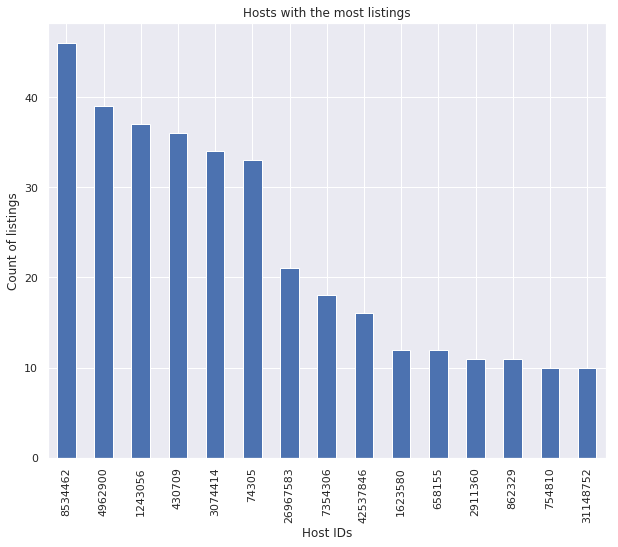

In [234]:
viz_1=tophost.plot(kind='bar')
viz_1.set_title('Hosts with the most listings')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=90)

In [235]:
topprice=listings.price.max()
topprice

999.0

In [236]:
top_neighbourhood_cleansed=listings.neighbourhood_cleansed.value_counts().head(15)
top_neighbourhood_cleansed

Broadway                     397
Belltown                     234
Wallingford                  167
Fremont                      158
Minor                        135
University District          122
Stevens                      119
First Hill                   108
Central Business District    103
Lower Queen Anne              94
Greenwood                     89
East Queen Anne               82
North Beacon Hill             78
Phinney Ridge                 73
Adams                         70
Name: neighbourhood_cleansed, dtype: int64

[Text(0, 0, 'Broadway'),
 Text(0, 0, 'Belltown'),
 Text(0, 0, 'Wallingford'),
 Text(0, 0, 'Fremont'),
 Text(0, 0, 'Minor'),
 Text(0, 0, 'University District'),
 Text(0, 0, 'Stevens'),
 Text(0, 0, 'First Hill'),
 Text(0, 0, 'Central Business District'),
 Text(0, 0, 'Lower Queen Anne'),
 Text(0, 0, 'Greenwood'),
 Text(0, 0, 'East Queen Anne'),
 Text(0, 0, 'North Beacon Hill'),
 Text(0, 0, 'Phinney Ridge'),
 Text(0, 0, 'Adams')]

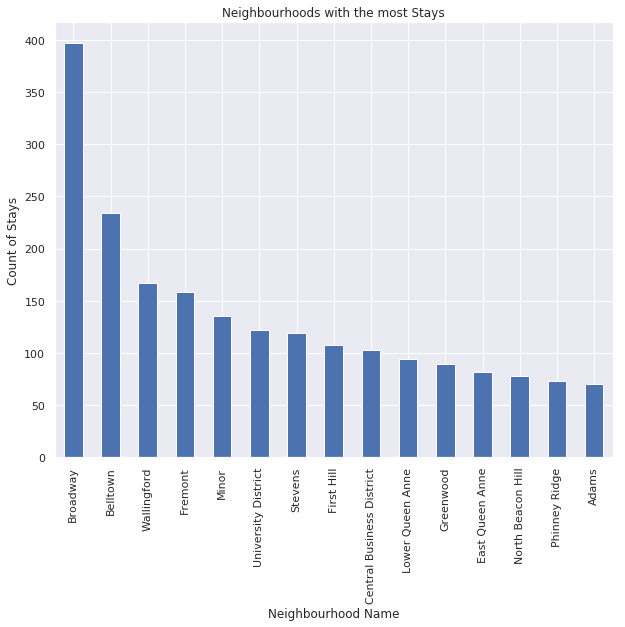

In [239]:
viz_1=top_neighbourhood_cleansed.plot(kind='bar')
viz_1.set_title('Neighbourhoods with the most Stays')
viz_1.set_ylabel('Count of Stays')
viz_1.set_xlabel('Neighbourhood Name')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=90)

In [251]:
listings.columns

Index(['id', 'host_id', 'host_name', 'host_since', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'zipcode', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_

In [ ]:
Using the numberical values to check which. factors are affecting the price

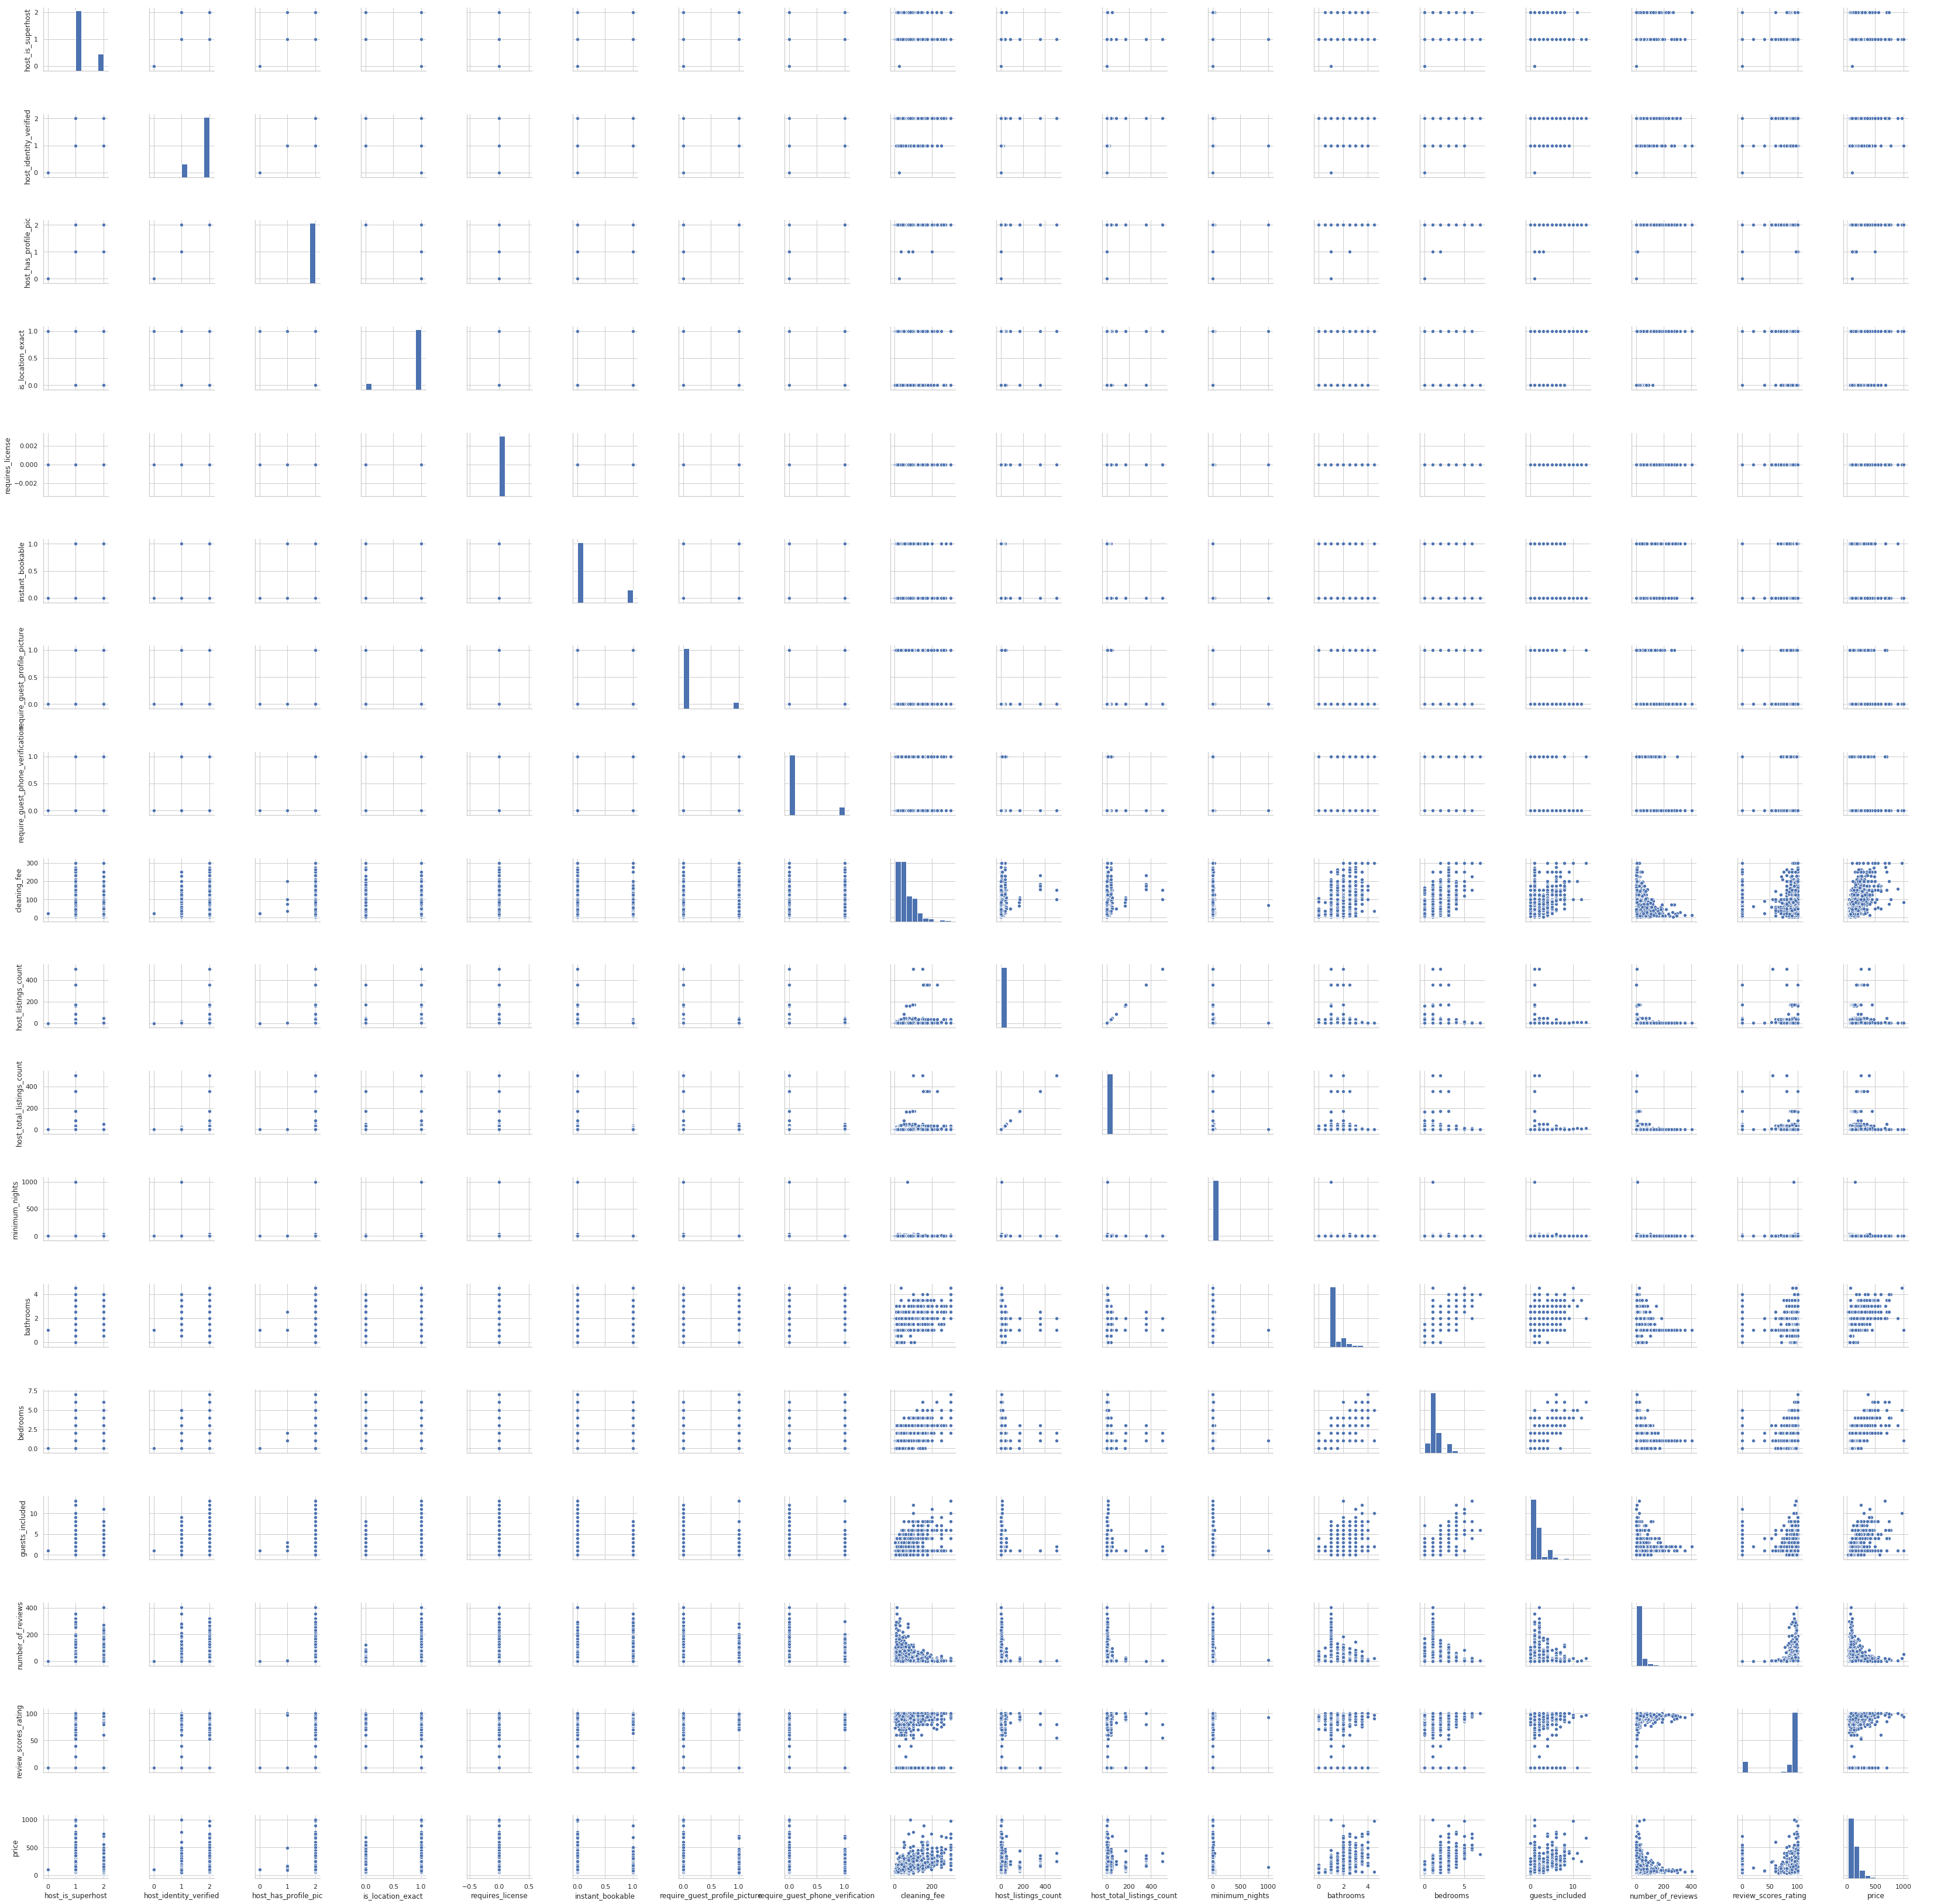

In [255]:
col = ['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic','is_location_exact', 
                         'requires_license', 'instant_bookable', 'require_guest_profile_picture', 
                         'require_guest_phone_verification', 'cleaning_fee', 
                         'host_listings_count', 'host_total_listings_count', 'minimum_nights',
                     'bathrooms', 'bedrooms', 'guests_included', 'number_of_reviews','review_scores_rating', 'price']
sns.set(style="whitegrid", color_codes=True)
sns.pairplot(listings.loc[(listings.price > 0)][col].dropna())
plt.show();

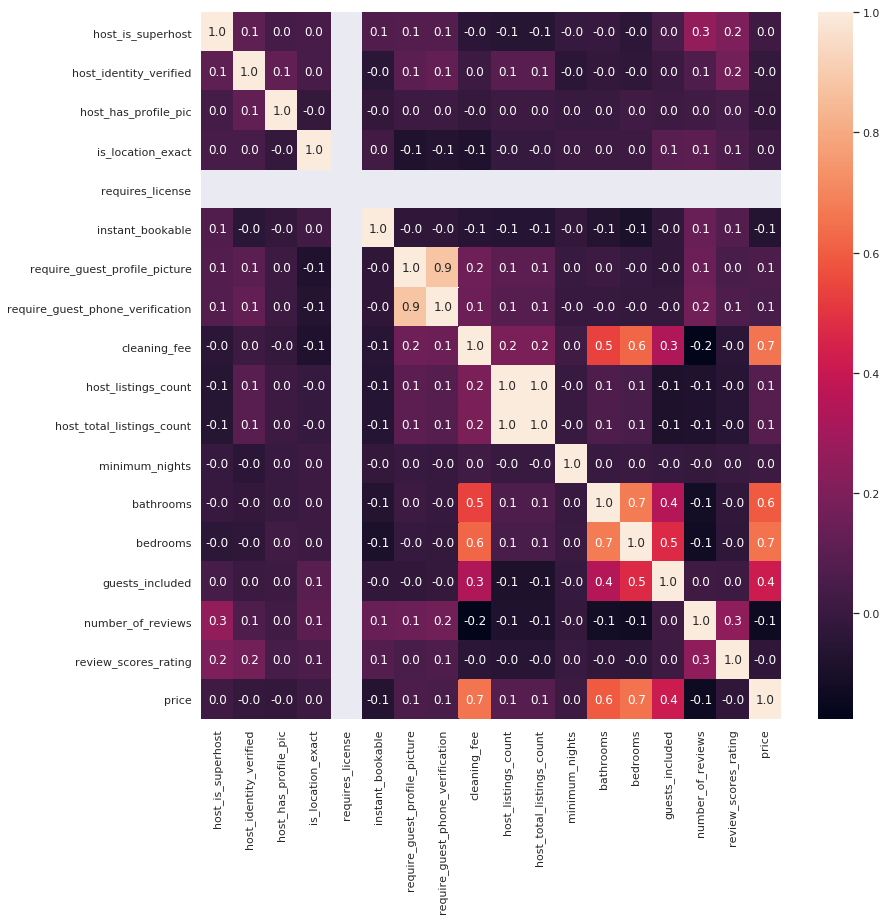

In [259]:
corr = listings.loc[(listings.price > 0)][col].dropna().corr()
plt.figure(figsize = (13,13))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, fmt = '.1f', xticklabels=col, yticklabels=col)
plt.show();